In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [7]:
# read the Houses dataset CSV file
housing_data = pd.read_csv("./real_estate.csv", sep=",")
housing_data.head()

,MLS,Location,Price,Bedrooms,Bathrooms,Size,Price/SQ.Ft,Status
0,132842,Arroyo Grande,795000.0,3,3,2371,335.30,Short Sale
1,134364,Paso Robles,399000.0,4,3,2818,141.59,Short Sale
2,135141,Paso Robles,545000.0,4,3,3032,179.75,Short Sale
3,135712,Morro Bay,909000.0,4,4,3540,256.78,Short Sale
4,136282,Santa Maria-Orcutt,109900.0,3,1,1249,87.99,Short Sale


In [8]:
# only get the Size and the Price features
Xs = housing_data[['Size']]
Ys = housing_data[['Price']]
print("Size shape:", Xs.shape)
print("Price shape:", Ys.shape)
dataset_size = Xs.shape[0]
print("Size:", dataset_size)

Size shape: (781, 1)
Price shape: (781, 1)
Size: 781


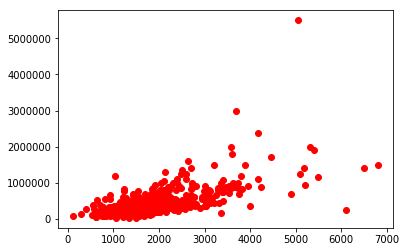

In [9]:
# plot the price and the size
plt.plot(Xs, Ys, 'ro')

In [10]:
Xs = Xs.values.squeeze()
Ys = Ys.values.squeeze()

In [11]:
# Normalize the input features
max_size = np.max(Xs)
min_size = np.min(Xs)
max_price = np.max(Ys)
min_price = np.min(Ys)

In [12]:
Xs = (Xs - min_size) / (max_size - min_size)
Ys = (Ys - min_price) / (max_price - min_price)

# shuffle the dataset before separating test/train sets
p = np.random.permutation(len(Xs))
Xs = Xs[p]
Ys = Ys[p]

In [13]:
# separate train/test sets 
# Use 80% for training and 20% for testing
train_size = int(0.8 * dataset_size)
Xs_train = Xs[0:train_size]
Xs_test = Xs[train_size:]
Ys_train = Ys[0:train_size]
Ys_test = Ys[train_size:]

Text(0, 0.5, 'Price')

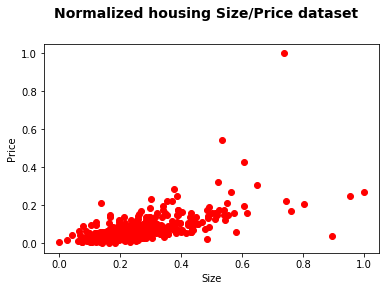

In [15]:
# plot the price and the size
fig = plt.figure()
fig.suptitle('Normalized housing Size/Price dataset', fontsize=14, fontweight='bold')
ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.85)
ax.plot(Xs_train, Ys_train, 'ro')
ax.set_xlabel('Size')
ax.set_ylabel('Price')

In [16]:
min_x = np.min(Xs_train)
max_x = np.max(Xs_train)

In [17]:
# Define the Linear model
# Initialize the weights using a normal (Gaussian) distribution with 0 mean and unit variance
W0 = np.random.normal(loc=0, scale=0.02) # Y intercept
W1 = np.asarray(np.random.normal(loc=0, scale=0.02)) # Slop of the line
W1 = W1.reshape((1))

In [18]:
def next_batch(Xs, Ys, batch_size=64):
    p = np.random.permutation(len(Xs))
    Xs = Xs[p]
    Ys = Ys[p]
    for i in range(0,Xs.shape[0],batch_size):
        x_batch = Xs[i:i+batch_size]
        if x_batch.shape[0] < batch_size:
            continue
        yield np.reshape(x_batch, (batch_size,-1)), Ys[i:i+batch_size]

In [19]:
def eval_and_plot(W0, W1, min_x, max_x, id_):
    min_y = W0 + np.dot(W1, min_x)
    max_y = W0 + np.dot(W1, max_x)
    plt.plot(Xs_train, Ys_train, 'ro')
    plt.plot([min_x, max_x], [min_y, max_y], 'k-', lw=2)
    #plt.savefig("./media/fit%(number)04d.png" % {"number": id_})
    #plt.clf()
    plt.show()

In [20]:
# defines the size of the step we want to perform in the direction of the gradient
lr = 0.1

# set the pocket weights
W0_hat = np.inf
W1_hat = np.inf
best_hypothesis = np.inf

validation_err_list = []
training_err_list = []
batch_size = 96
total_epochs = 150

In [21]:
def mean_squared_error(Ys_batch, Y_pred):
    return np.mean((Ys_batch-Y_pred)**2)

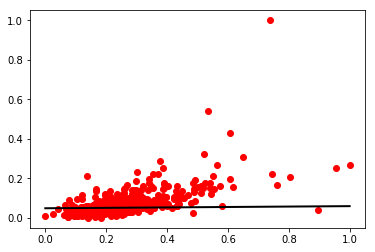

Epoch: 0 Generalization err: 0.003768125802870576


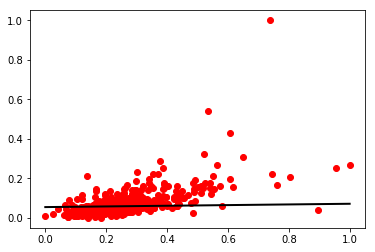

Epoch: 1 Generalization err: 0.0034806451051176105


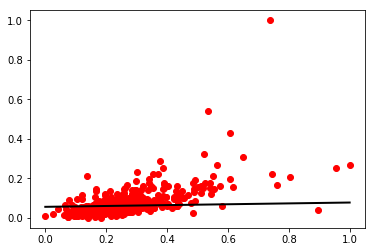

Epoch: 2 Generalization err: 0.0033760384288269623


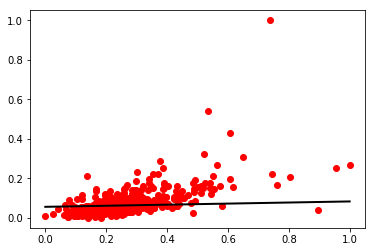

Epoch: 3 Generalization err: 0.0032939929548414064


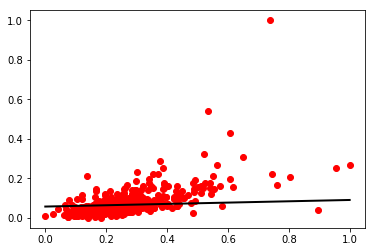

Epoch: 4 Generalization err: 0.003196495615137997


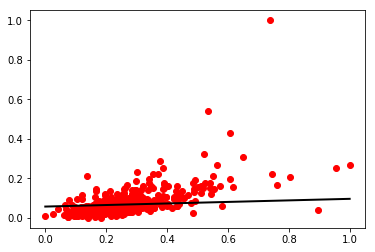

Epoch: 5 Generalization err: 0.003125948544698454


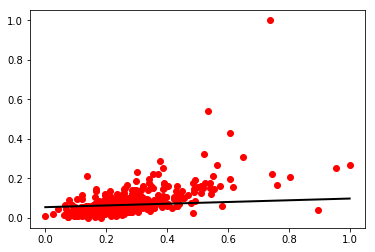

Epoch: 6 Generalization err: 0.003091751336712869


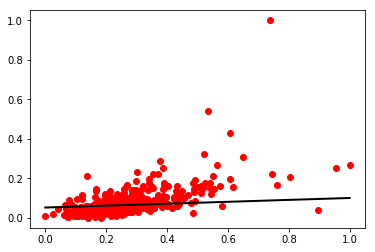

Epoch: 7 Generalization err: 0.0030492210900124267


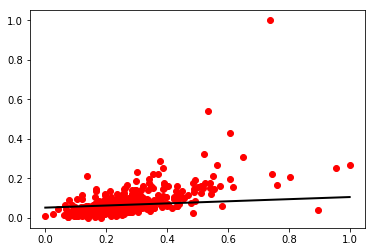

Epoch: 8 Generalization err: 0.0029882256391519984


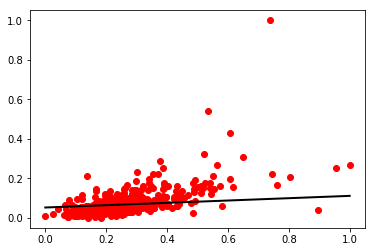

Epoch: 9 Generalization err: 0.002922208329854852


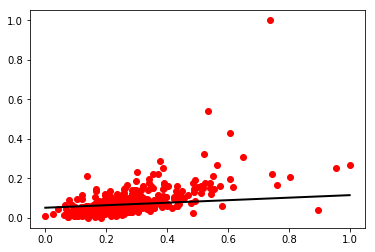

Epoch: 10 Generalization err: 0.002875072799979167


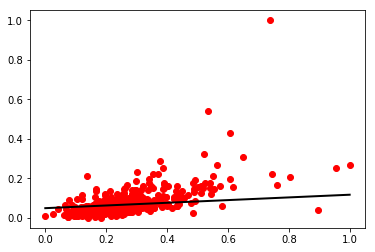

Epoch: 11 Generalization err: 0.002837659686530486


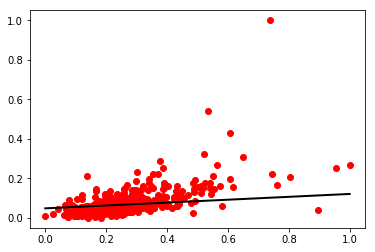

Epoch: 12 Generalization err: 0.0027896840412593303


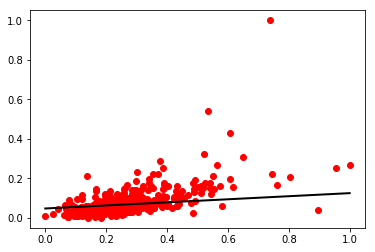

Epoch: 13 Generalization err: 0.0027423131419634403


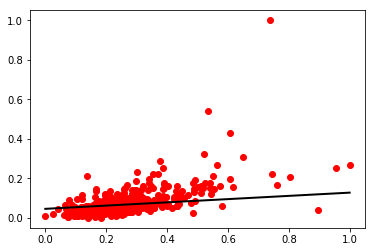

Epoch: 14 Generalization err: 0.0027052489857903412


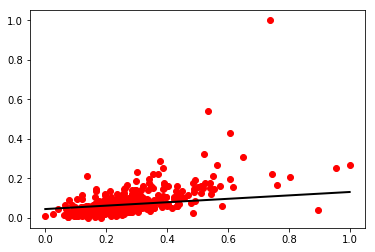

Epoch: 15 Generalization err: 0.002665164361333952


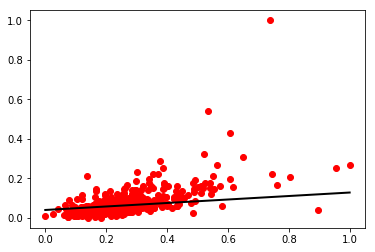

Epoch: 16 Generalization err: 0.0026884157788943028


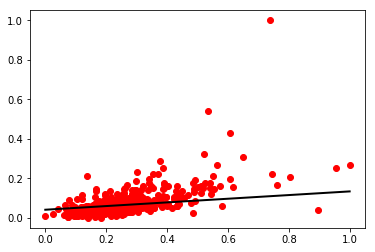

Epoch: 17 Generalization err: 0.0026212191088318855


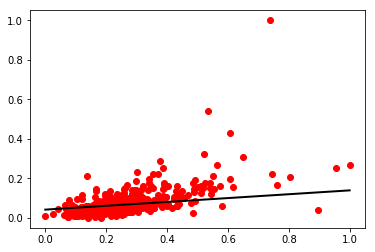

Epoch: 18 Generalization err: 0.0025670263365155663


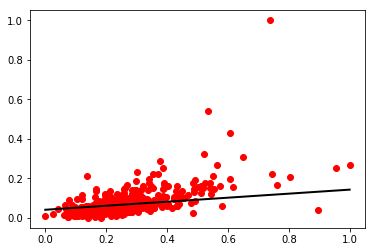

Epoch: 19 Generalization err: 0.0025266140080098544


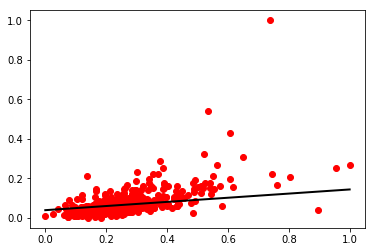

Epoch: 20 Generalization err: 0.002508953269399842


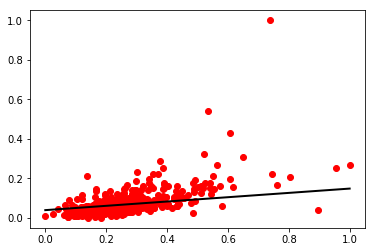

Epoch: 21 Generalization err: 0.002465785628233076


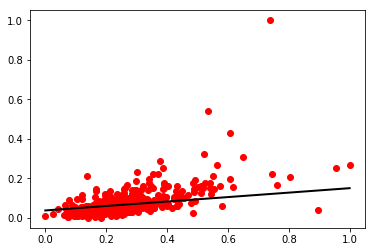

Epoch: 22 Generalization err: 0.0024389845019116246


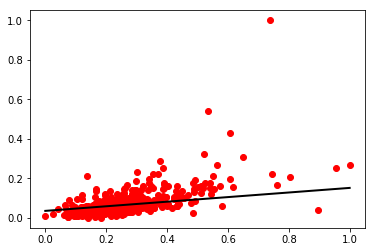

Epoch: 23 Generalization err: 0.00241898007816328


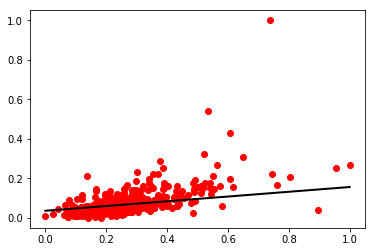

Epoch: 24 Generalization err: 0.0023761648189394133


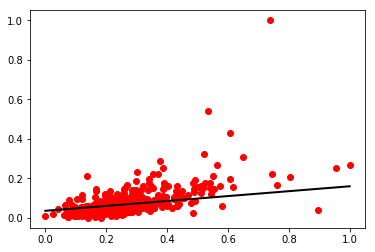

Epoch: 25 Generalization err: 0.002341064331528743


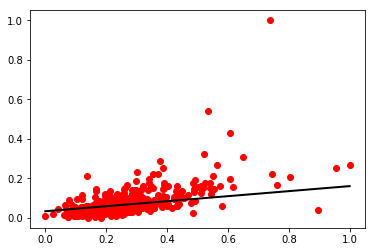

Epoch: 26 Generalization err: 0.0023250075892503694


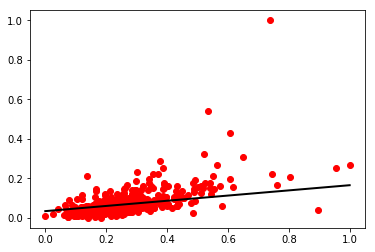

Epoch: 27 Generalization err: 0.0022857729232041595


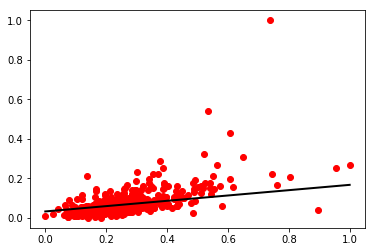

Epoch: 28 Generalization err: 0.0022630915559017544


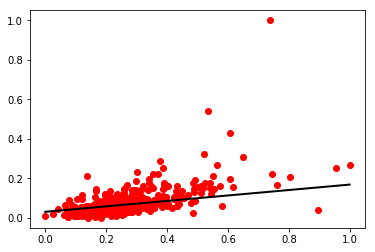

Epoch: 29 Generalization err: 0.00224497408215625


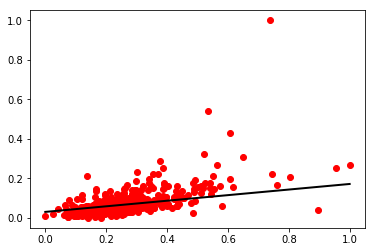

Epoch: 30 Generalization err: 0.002215791050601363


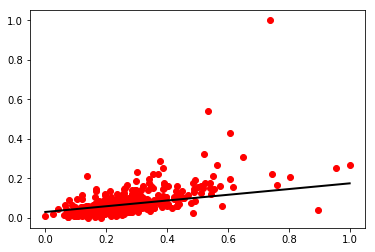

Epoch: 31 Generalization err: 0.0021874253863611217


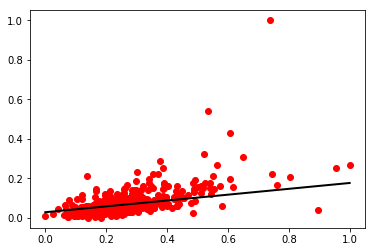

Epoch: 32 Generalization err: 0.0021672503791897195


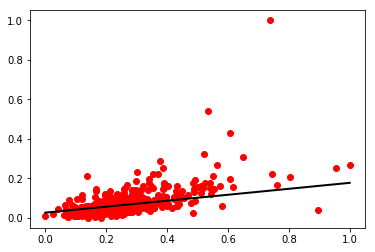

Epoch: 33 Generalization err: 0.0021575391697155628


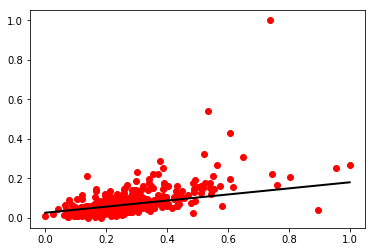

Epoch: 34 Generalization err: 0.00213241730756195


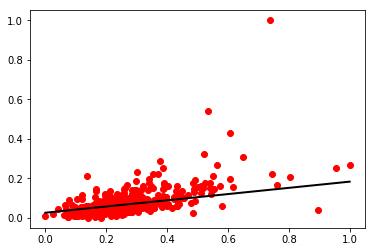

Epoch: 35 Generalization err: 0.002103275643286617


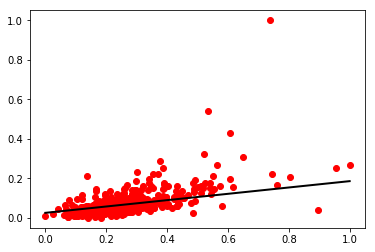

Epoch: 36 Generalization err: 0.002080673231147361


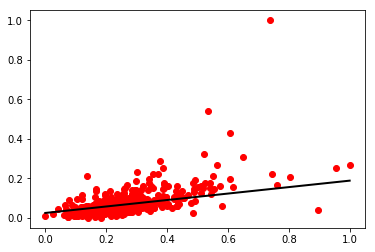

Epoch: 37 Generalization err: 0.002059061384274444


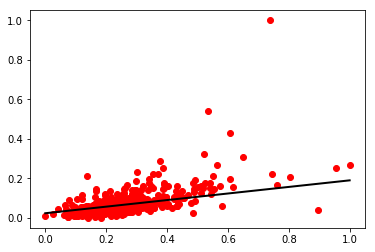

Epoch: 38 Generalization err: 0.0020433924545321448


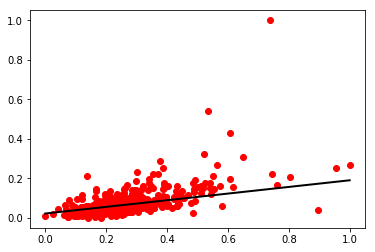

Epoch: 39 Generalization err: 0.002039298939551402


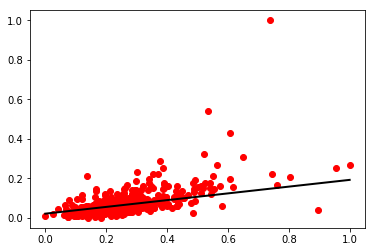

Epoch: 40 Generalization err: 0.002021134850841761


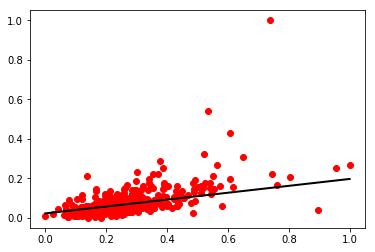

Epoch: 41 Generalization err: 0.0019862299328974996


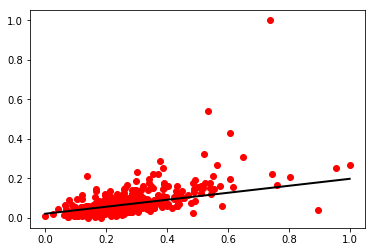

Epoch: 42 Generalization err: 0.001976791455650813


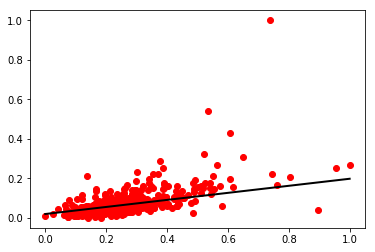

Epoch: 43 Generalization err: 0.00197309980362898


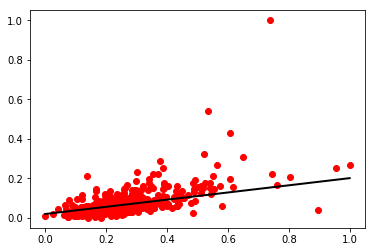

Epoch: 44 Generalization err: 0.0019484963420679507


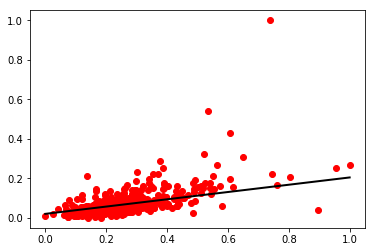

Epoch: 45 Generalization err: 0.001924303972240993


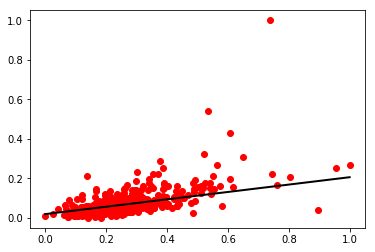

Epoch: 46 Generalization err: 0.001912168165226186


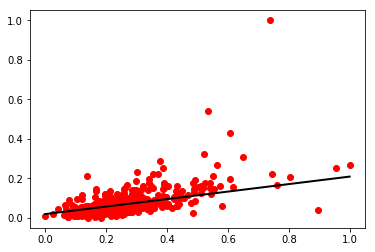

Epoch: 47 Generalization err: 0.00189137412617943


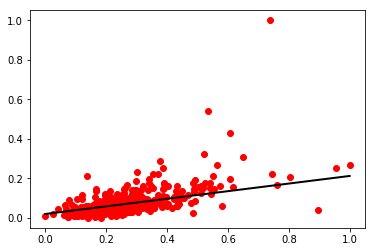

Epoch: 48 Generalization err: 0.0018731383795284786


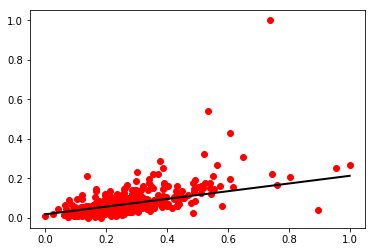

Epoch: 49 Generalization err: 0.0018614302220980252


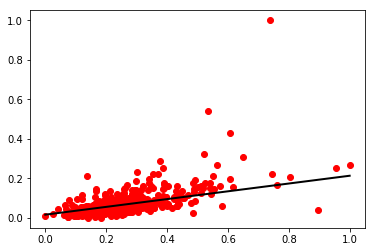

Epoch: 50 Generalization err: 0.0018540616273207543


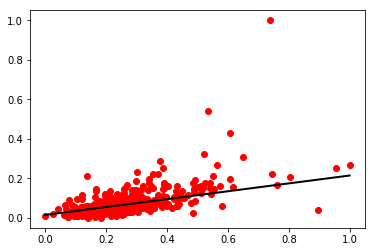

Epoch: 51 Generalization err: 0.0018447100268188684


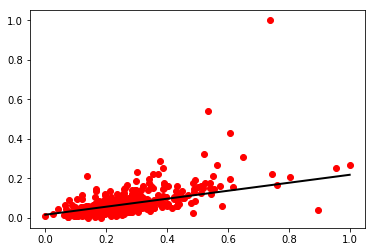

Epoch: 52 Generalization err: 0.0018221910867262825


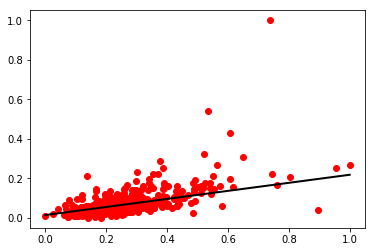

Epoch: 53 Generalization err: 0.0018175599432833885


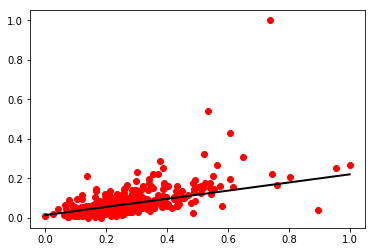

Epoch: 54 Generalization err: 0.0018031504520509445


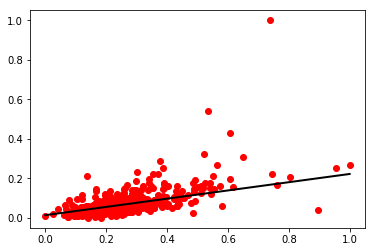

Epoch: 55 Generalization err: 0.0017897743254754602


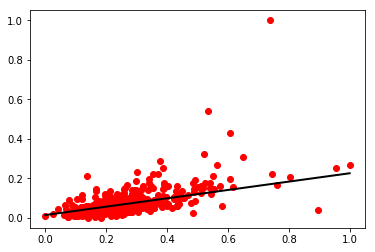

Epoch: 56 Generalization err: 0.001770945794665617


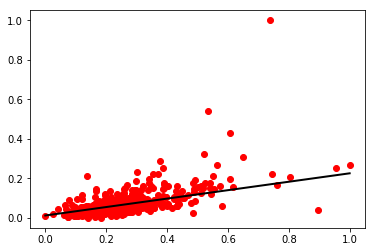

Epoch: 57 Generalization err: 0.0017658377065340783


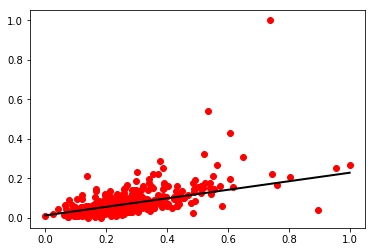

Epoch: 58 Generalization err: 0.0017492717063546004


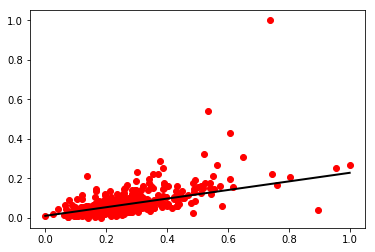

Epoch: 59 Generalization err: 0.0017480604924208663


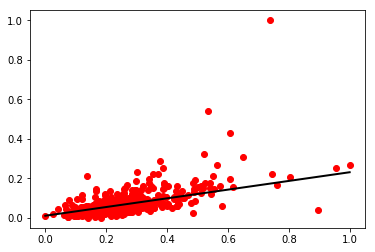

Epoch: 60 Generalization err: 0.0017305820562320507


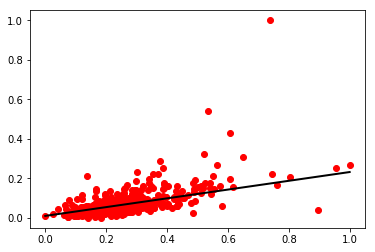

Epoch: 61 Generalization err: 0.0017231800828839785


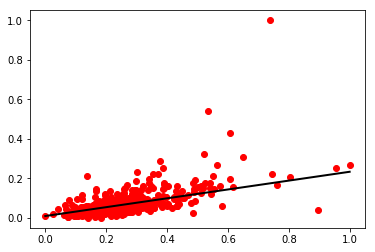

Epoch: 62 Generalization err: 0.0017141365295723317


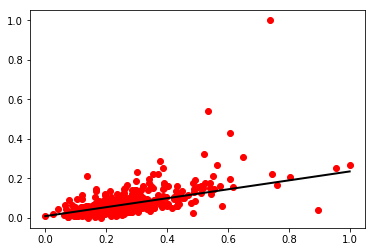

Epoch: 63 Generalization err: 0.001703912592192913


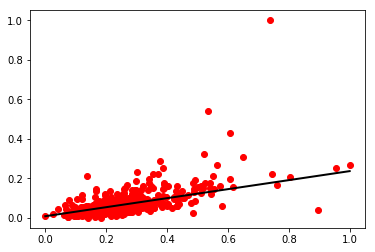

Epoch: 64 Generalization err: 0.0016938363756605164


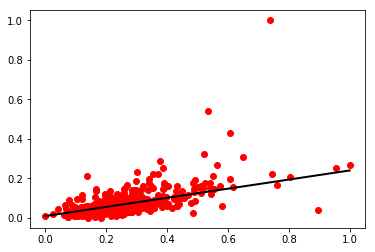

Epoch: 65 Generalization err: 0.0016783321373655584


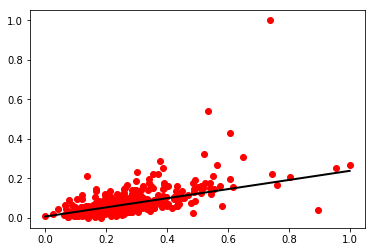

Epoch: 66 Generalization err: 0.0016850184323267637


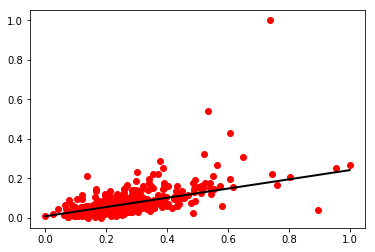

Epoch: 67 Generalization err: 0.0016669360356455875


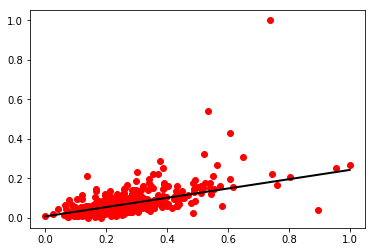

Epoch: 68 Generalization err: 0.0016598951447107423


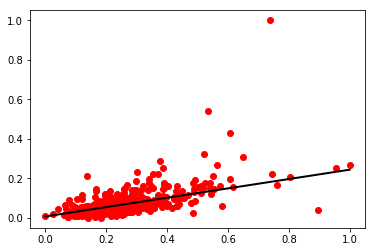

Epoch: 69 Generalization err: 0.0016523910038576824


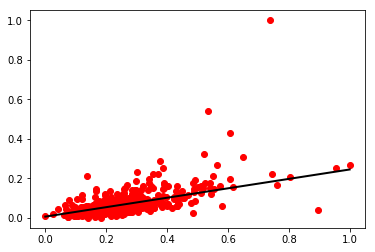

Epoch: 70 Generalization err: 0.0016454476707835747


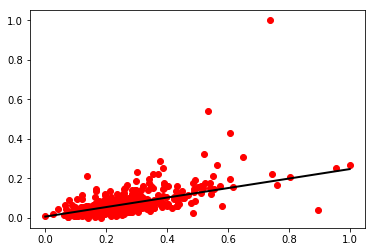

Epoch: 71 Generalization err: 0.0016360718472637355


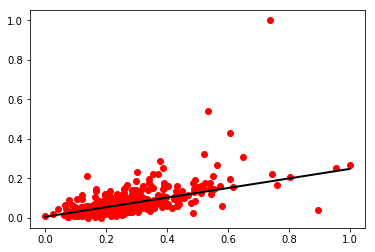

Epoch: 72 Generalization err: 0.0016296660996090704


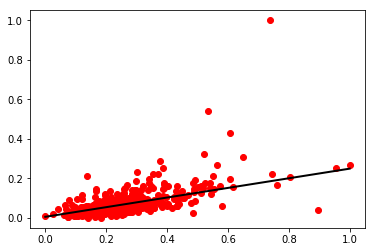

Epoch: 73 Generalization err: 0.0016226293968027389


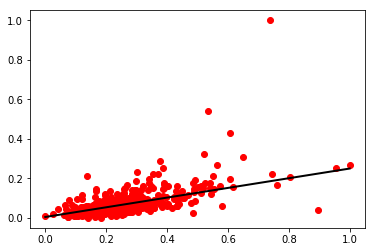

Epoch: 74 Generalization err: 0.0016182855026438724


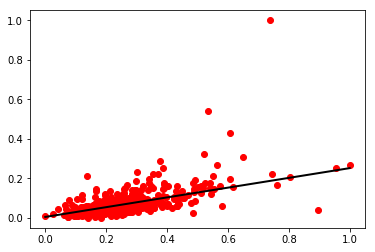

Epoch: 75 Generalization err: 0.001608717165092303


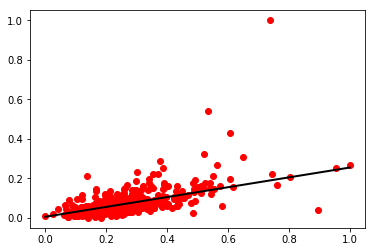

Epoch: 76 Generalization err: 0.0016000086525367425


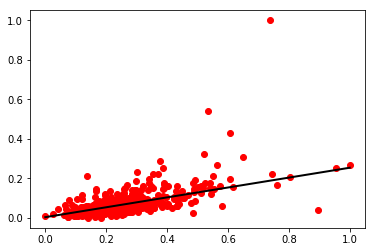

Epoch: 77 Generalization err: 0.0015970105621984907


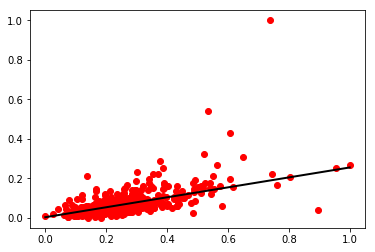

Epoch: 78 Generalization err: 0.0015903325627216868


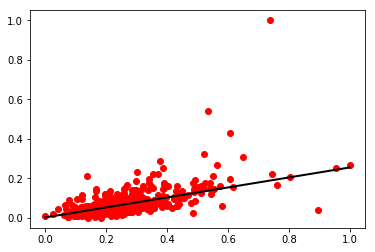

Epoch: 79 Generalization err: 0.0015889473312183928


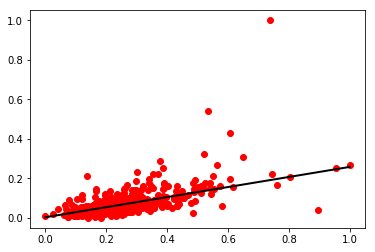

Epoch: 80 Generalization err: 0.0015778290235843827


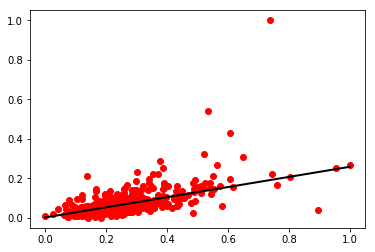

Epoch: 81 Generalization err: 0.0015735804653460874


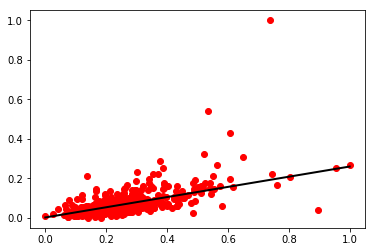

Epoch: 82 Generalization err: 0.0015671669178314118


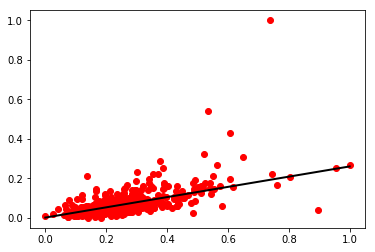

Epoch: 83 Generalization err: 0.0015636521667416908


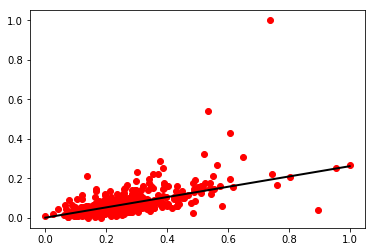

Epoch: 84 Generalization err: 0.0015579002521580911


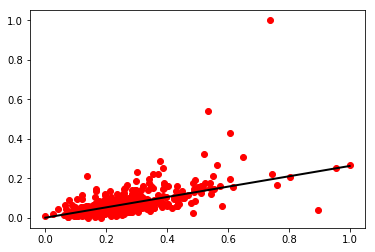

Epoch: 85 Generalization err: 0.0015527887451176987


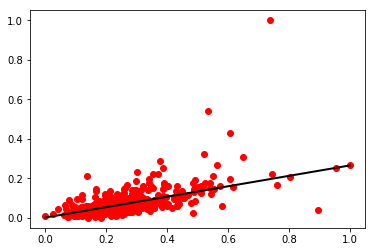

Epoch: 86 Generalization err: 0.0015453576784623911


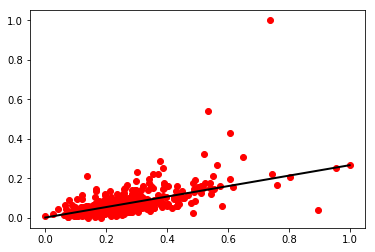

Epoch: 87 Generalization err: 0.0015408379390449613


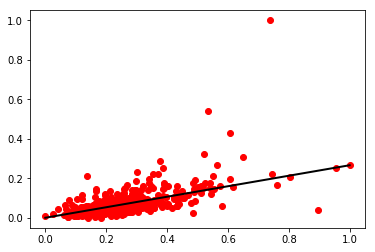

Epoch: 88 Generalization err: 0.0015373300277285974


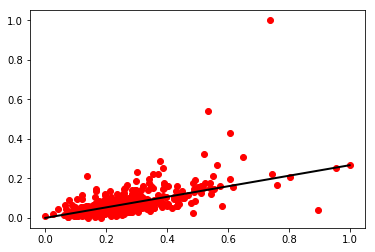

Epoch: 89 Generalization err: 0.0015350511993614414


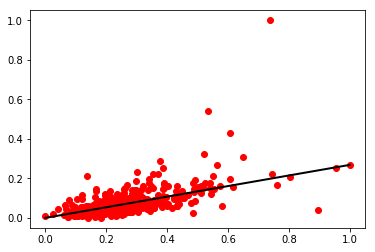

Epoch: 90 Generalization err: 0.0015295539314164849


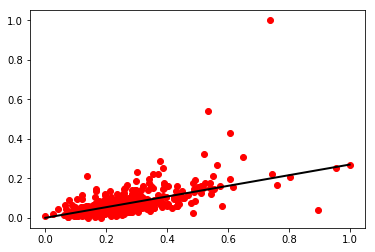

Epoch: 91 Generalization err: 0.0015248140447635644


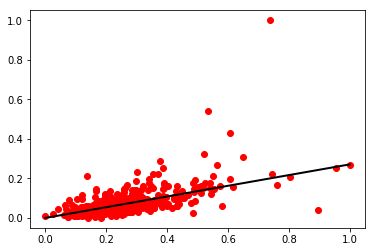

Epoch: 92 Generalization err: 0.0015201917234246012


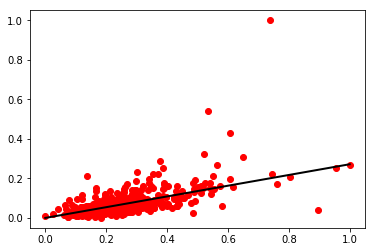

Epoch: 93 Generalization err: 0.0015174470051517544


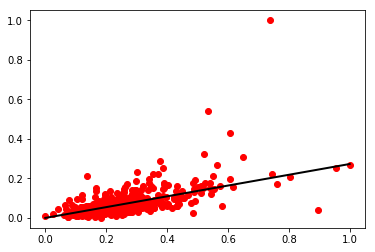

Epoch: 94 Generalization err: 0.0015132439552317824


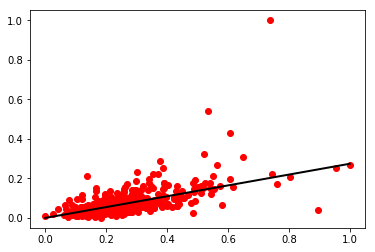

Epoch: 95 Generalization err: 0.0015092531649450623


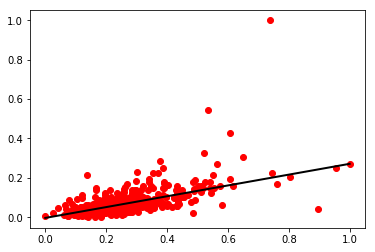

Epoch: 96 Generalization err: 0.0015124186086584008


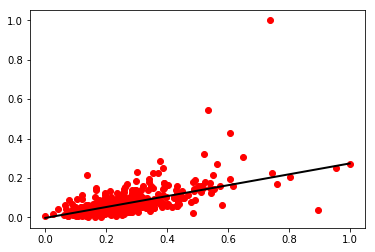

Epoch: 97 Generalization err: 0.0015038893575288533


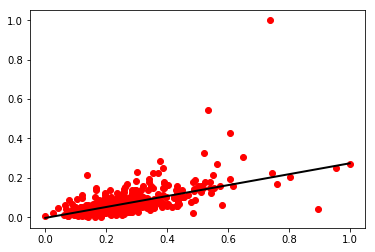

Epoch: 98 Generalization err: 0.0015025563712694522


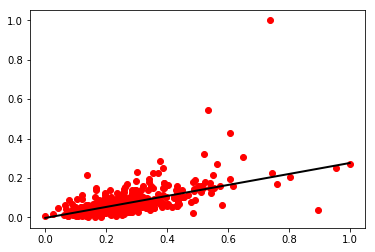

Epoch: 99 Generalization err: 0.001496470854021292


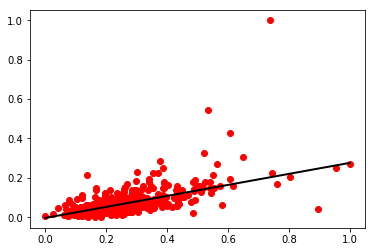

Epoch: 100 Generalization err: 0.0014944621460503639


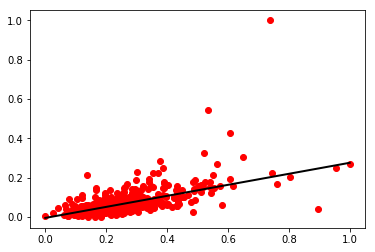

Epoch: 101 Generalization err: 0.0014937733417712943


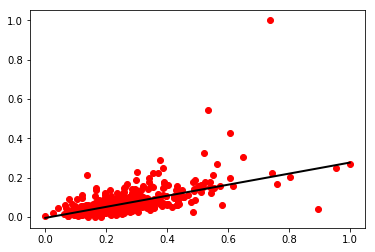

Epoch: 102 Generalization err: 0.0014910760588798702


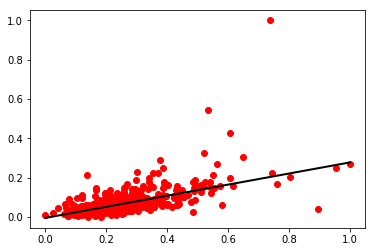

Epoch: 103 Generalization err: 0.0014897871524209177


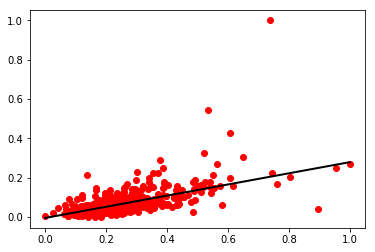

Epoch: 104 Generalization err: 0.0014827007097775236


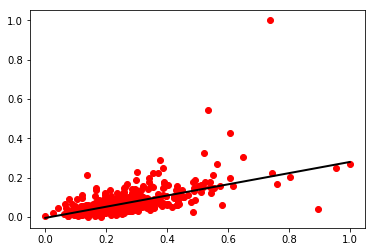

Epoch: 105 Generalization err: 0.0014802381544859146


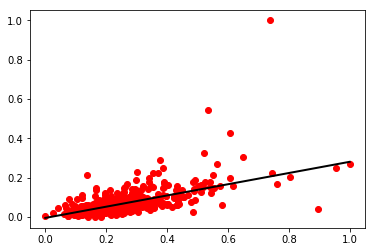

Epoch: 106 Generalization err: 0.001476913723016135


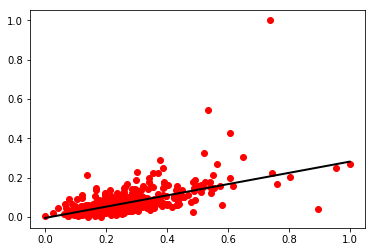

Epoch: 107 Generalization err: 0.0014744003920146092


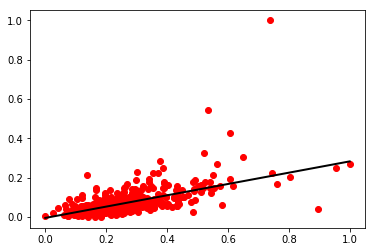

Epoch: 108 Generalization err: 0.001471091338459682


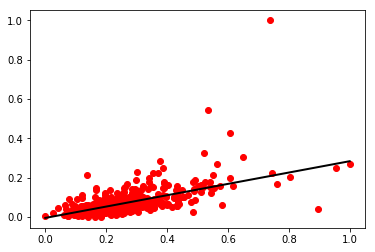

Epoch: 109 Generalization err: 0.0014685982771350681


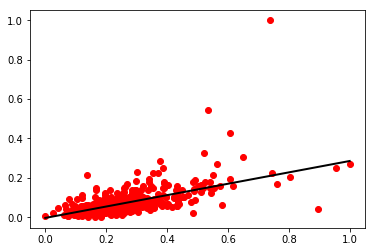

Epoch: 110 Generalization err: 0.001466921237413388


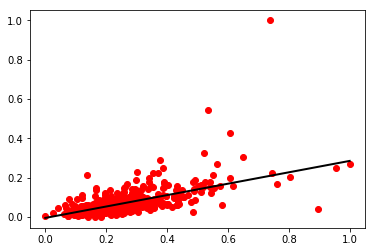

Epoch: 111 Generalization err: 0.0014643647007730547


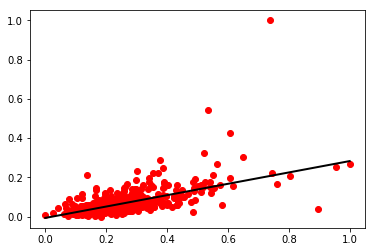

Epoch: 112 Generalization err: 0.0014665684180587225


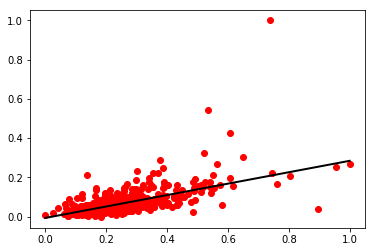

Epoch: 113 Generalization err: 0.00146210210439204


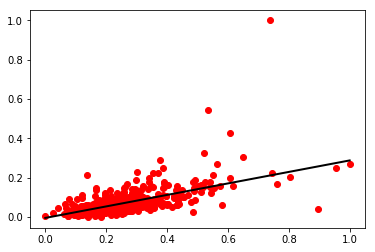

Epoch: 114 Generalization err: 0.0014581783107719978


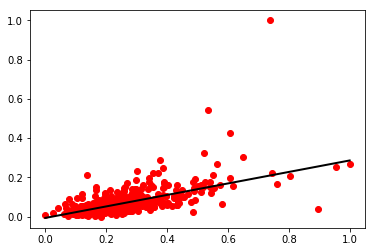

Epoch: 115 Generalization err: 0.0014571052560806129


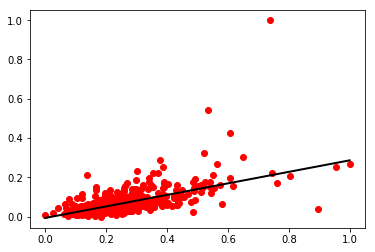

Epoch: 116 Generalization err: 0.001455641839736218


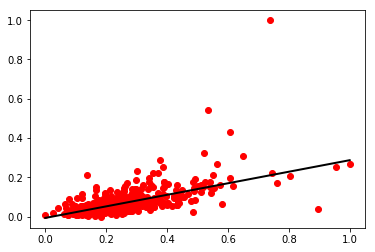

Epoch: 117 Generalization err: 0.0014534029595426703


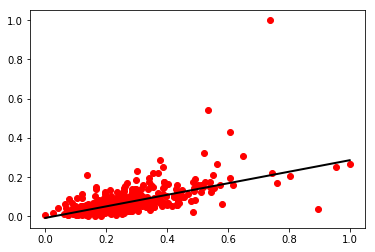

Epoch: 118 Generalization err: 0.001454320553136332


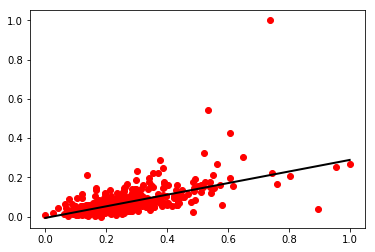

Epoch: 119 Generalization err: 0.0014497201867646734


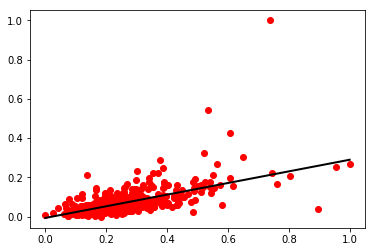

Epoch: 120 Generalization err: 0.0014478514886538006


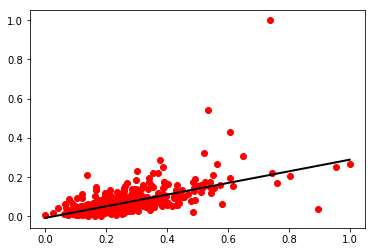

Epoch: 121 Generalization err: 0.0014462021797429748


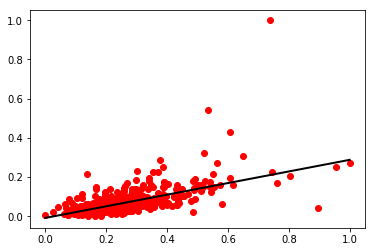

Epoch: 122 Generalization err: 0.001450253319329666


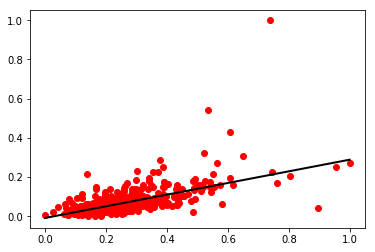

Epoch: 123 Generalization err: 0.001447439456884332


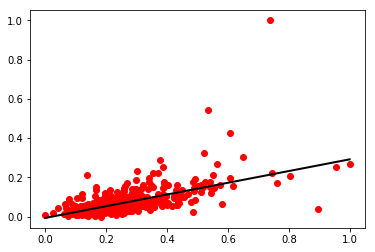

Epoch: 124 Generalization err: 0.0014418568434100346


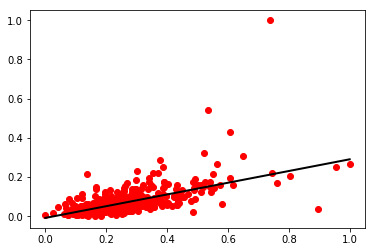

Epoch: 125 Generalization err: 0.0014408159911792687


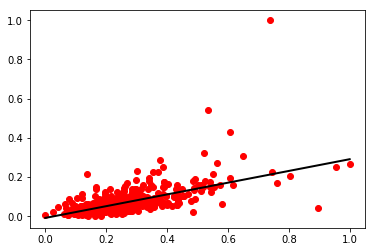

Epoch: 126 Generalization err: 0.0014398891171064885


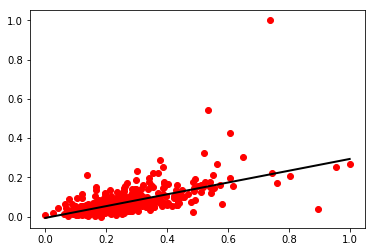

Epoch: 127 Generalization err: 0.0014377177417851284


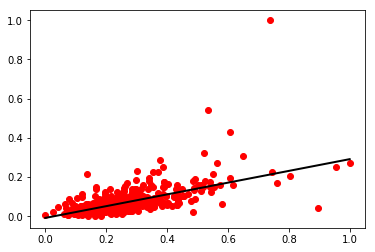

Epoch: 128 Generalization err: 0.001439522073136256


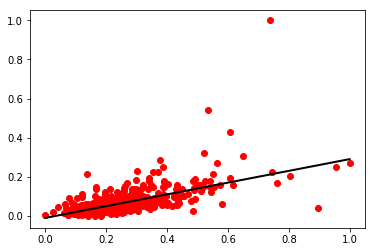

Epoch: 129 Generalization err: 0.0014397827724252276


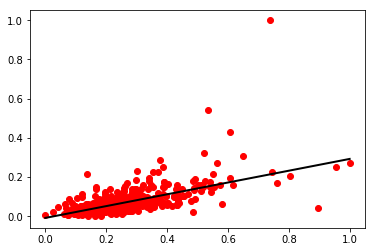

Epoch: 130 Generalization err: 0.0014360308029167516


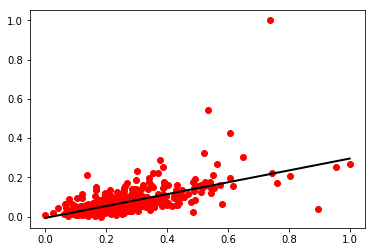

Epoch: 131 Generalization err: 0.0014343937214846684


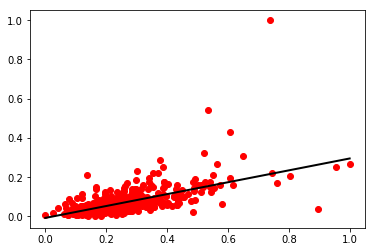

Epoch: 132 Generalization err: 0.0014321682545097353


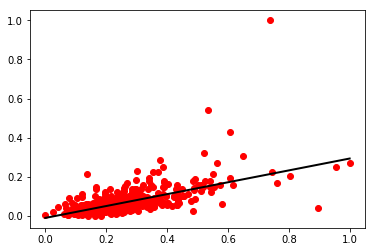

Epoch: 133 Generalization err: 0.0014309402345275561


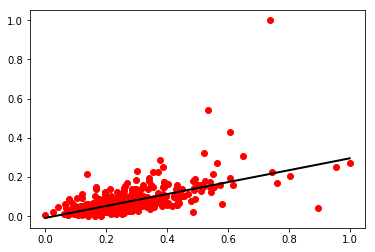

Epoch: 134 Generalization err: 0.0014287304143396106


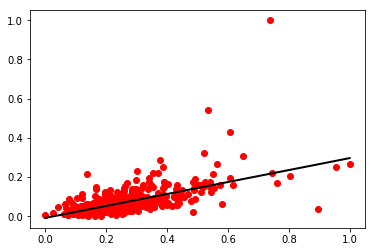

Epoch: 135 Generalization err: 0.001427679376872654


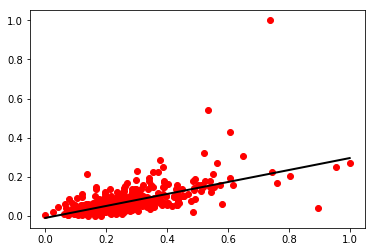

Epoch: 136 Generalization err: 0.0014255834938104702


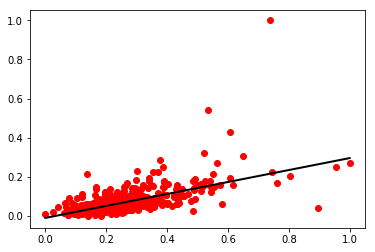

Epoch: 137 Generalization err: 0.0014257825079699482


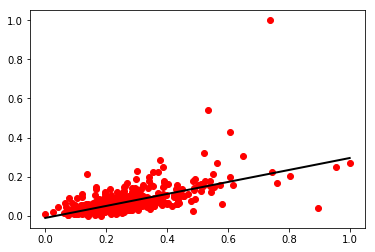

Epoch: 138 Generalization err: 0.0014254944463371712


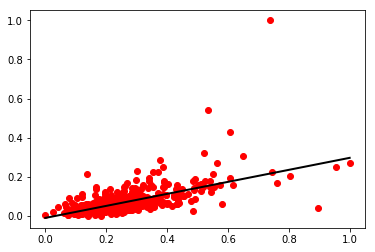

Epoch: 139 Generalization err: 0.0014225695229227264


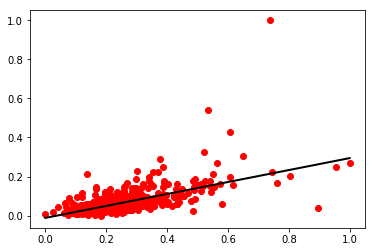

Epoch: 140 Generalization err: 0.0014296342534352283


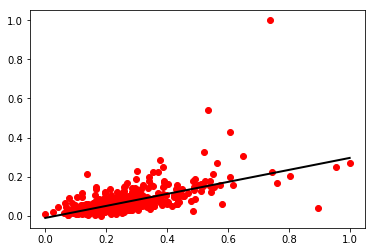

Epoch: 141 Generalization err: 0.0014250839631309272


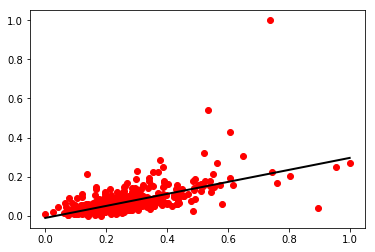

Epoch: 142 Generalization err: 0.0014237556007743745


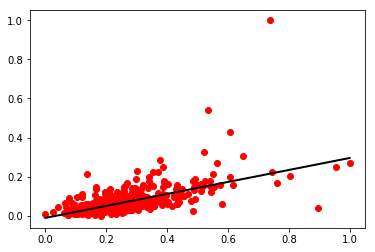

Epoch: 143 Generalization err: 0.0014254640276421926


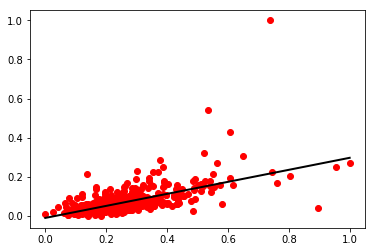

Epoch: 144 Generalization err: 0.0014222089748078847


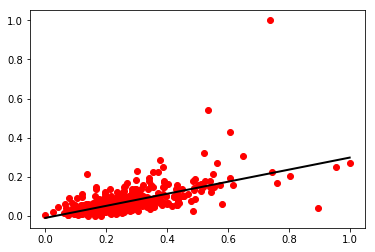

Epoch: 145 Generalization err: 0.00141997216015237


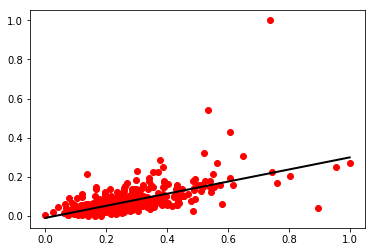

Epoch: 146 Generalization err: 0.001418575029103937


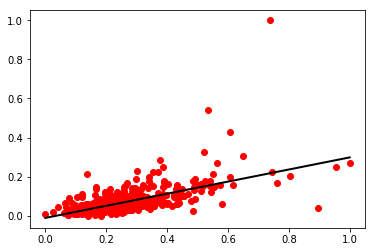

Epoch: 147 Generalization err: 0.0014175786344258815


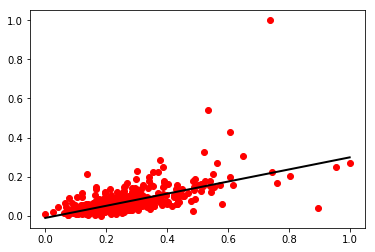

Epoch: 148 Generalization err: 0.0014173035085487957


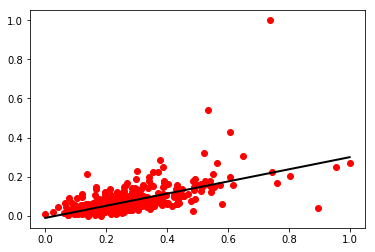

Epoch: 149 Generalization err: 0.0014150011011171376


In [22]:
for epoch in range(total_epochs):
    erros = []
    for X_batch, y_batch in next_batch(Xs_train, Ys_train, batch_size=batch_size):

        # linearly combine input and weights
        train_pred = W0 + np.dot(X_batch, W1)
    
        # calculate the SSE between predicted and true values
        train_err = mean_squared_error(y_batch, train_pred)
        erros.append(train_err)
        
        # calculate the gradients with respect to W0 and W1
        DW0 = -(2/batch_size) * sum(y_batch.squeeze() - train_pred.squeeze())
        DW1 = -(2/batch_size) * sum(X_batch.squeeze() * (y_batch.squeeze() - train_pred.squeeze()))

        # update W0 and W1 in the opposite direction to the gradient
        W0 = W0 - lr * DW0
        W1 = W1 - lr * DW1
    
    eval_and_plot(W0, W1, min_x, max_x, epoch+1)
    training_err_list.append(np.mean(erros))
    
    # test in the end of epoch
    val_pred = W0 + np.dot(np.reshape(Xs_test, (-1,1)), W1)
    val_err = mean_squared_error(Ys_test, val_pred)
    print("Epoch:", epoch, "Generalization err:", val_err)
    validation_err_list.append(val_err)
    
    #epoch += 1
    if val_err < best_hypothesis:
        best_hypothesis = val_err
        W0_hat = W0
        W1_hat = W1

Text(0, 0.5, 'Error')

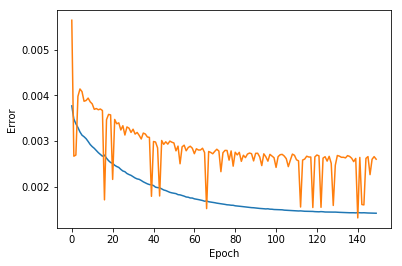

In [23]:
# plot the price and the size
plt.plot(validation_err_list, label="validation")
plt.plot(training_err_list, label="training")
plt.xlabel('Epoch')
plt.ylabel('Error')